In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

from src.data_loader import *
import src.models.similarity_matrix as sm

In [3]:
embeddings, similarity_matrix = sm.load_embedding_similarity_matrix()
shortest_path_matrix = read_matrix()
shortest_path_matrix.head(3)

The rows are the source articles and the columns are the destination articles


article,Áedán mac Gabráin,Åland,Édouard Manet,Éire,Óengus I of the Picts,€2 commemorative coins,10th century,11th century,12th century,13th century,...,Ziad Jarrah,Zimbabwe,Zinc,Zinc chloride,Zion National Park,Zionism,Zirconium,Zoroaster,Zuid-Gelders,Zulu
article,,,,,,,,,,,,,,,,,,,,,
Áedán mac Gabráin,0,-1,-1,-1,-1,-1,3,3,3,3,...,4,3,3,4,4,3,4,4,4,2
Åland,-1,0,-1,-1,-1,-1,2,2,2,2,...,4,2,3,4,4,3,4,3,3,3
Édouard Manet,-1,-1,0,-1,-1,-1,3,3,2,2,...,4,3,2,3,4,3,4,3,3,3


# Sparsity of the shortest paths

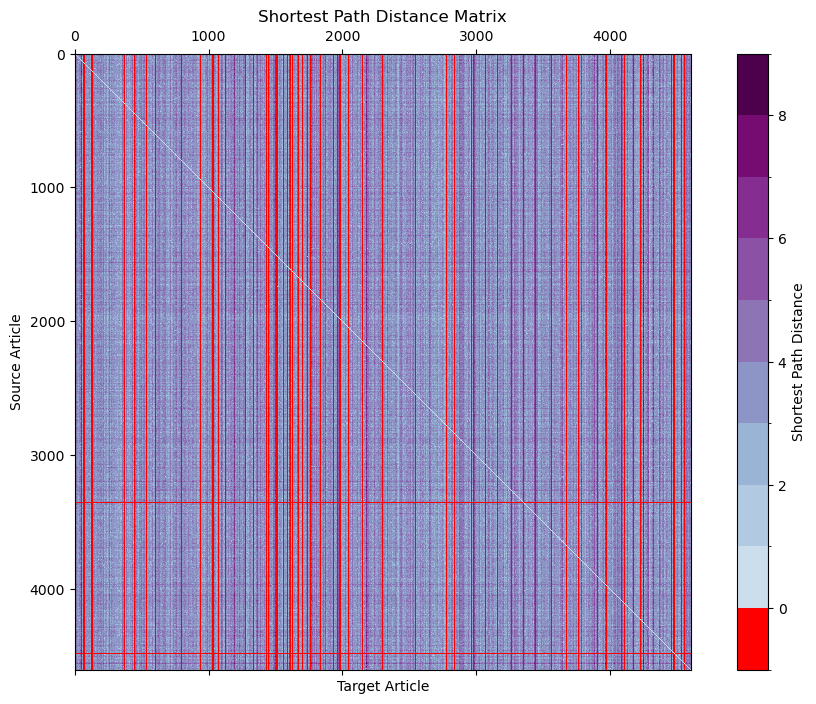

In [4]:
# Define a colormap with a specific color for NaN values (gray) and main colors for distances
cmap = mcolors.ListedColormap(['red'] + plt.cm.BuPu(np.linspace(0.2, 1, 9)).tolist())

bounds = [-1] + list(range(10))
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot using matshow
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(shortest_path_matrix, cmap=cmap, norm=norm)
fig.colorbar(cax, label='Shortest Path Distance')

plt.title('Shortest Path Distance Matrix')
plt.xlabel('Target Article')
plt.ylabel('Source Article')
plt.show()

In [27]:
# Total number of article pairs
total_pairs = shortest_path_matrix.size

# Number of reachable pairs (distance from 1 to 9)
# Exclude self-pairs where distance is 0
# Unreachable pairs are represented by -1

# Create a mask for self-pairs (distance == 0)
self_pairs_mask = (shortest_path_matrix == 0)

# Create a mask for reachable pairs (distance between 1 and 9)
reachable_mask = (shortest_path_matrix >= 1) & (shortest_path_matrix <= 9)


reachable_pairs = np.count_nonzero(reachable_mask)
unreachable_pairs = np.count_nonzero(shortest_path_matrix == -1)

# Sparsity percentage: proportion of unreachable pairs
sparsity_percentage = ((unreachable_pairs + len(self_pairs_mask) ) / total_pairs) * 100

print(f"Total pairs: {total_pairs}")
print(f"Reachable pairs: {reachable_pairs}")
print(f"Unreachable pairs: {unreachable_pairs}")
print(f"Sparsity percentage: {sparsity_percentage:.2f}%")

Total pairs: 21196816
Reachable pairs: 18588235
Unreachable pairs: 2603977
Sparsity percentage: 12.31%


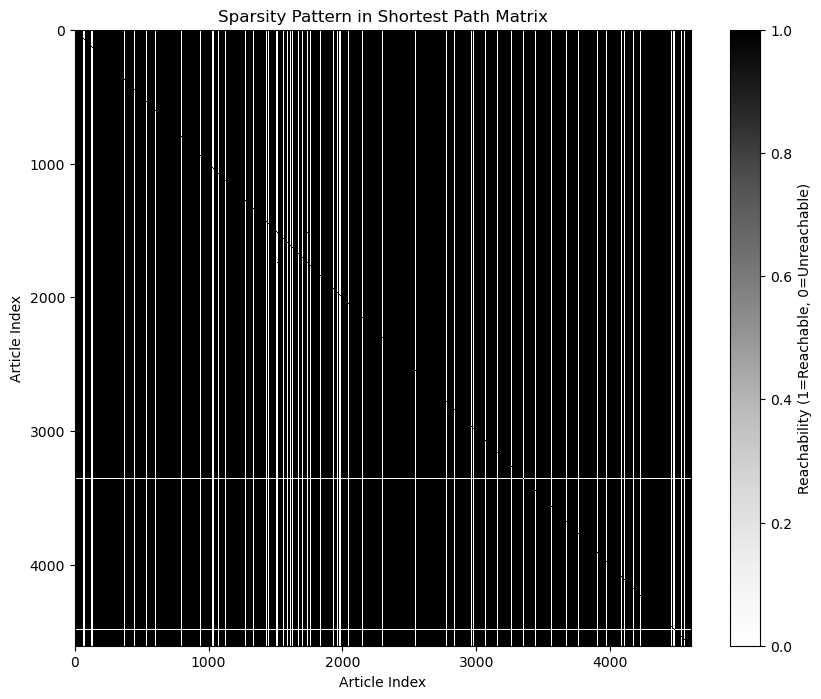

In [20]:
# Create a binary matrix where 1 represents a reachable path and 0 represents an unreachable path
sparsity_matrix = np.where(shortest_path_matrix == -1, 0, 1)

plt.figure(figsize=(10, 8))
plt.imshow(sparsity_matrix, cmap='Greys', interpolation='nearest')
plt.title('Sparsity Pattern in Shortest Path Matrix')
plt.xlabel('Article Index')
plt.ylabel('Article Index')
plt.colorbar(label='Reachability (1=Reachable, 0=Unreachable)')
plt.show()

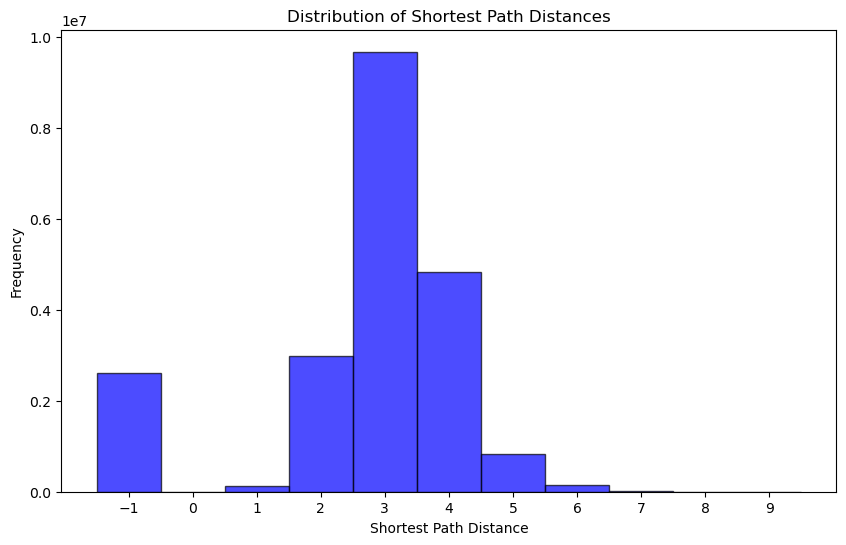

In [29]:
shortest_distances_flat = shortest_path_matrix.values.flatten()

plt.figure(figsize=(10, 6))
plt.hist(shortest_distances_flat, bins=np.arange(-1,11,1) - 0.5 , color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Shortest Path Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Shortest Path Distances')
plt.xticks(np.arange(-1,10,1))
plt.show()

# Visualization Shortest path & semantic matrix distance

In [18]:
shortest_distances = shortest_path_matrix.values.flatten()
semantic_similarities = similarity_matrix.flatten()

# Convert to DataFrame for seaborn compatibility
df = pd.DataFrame({'Shortest Distance': shortest_distances, 'Semantic Similarity': semantic_similarities})

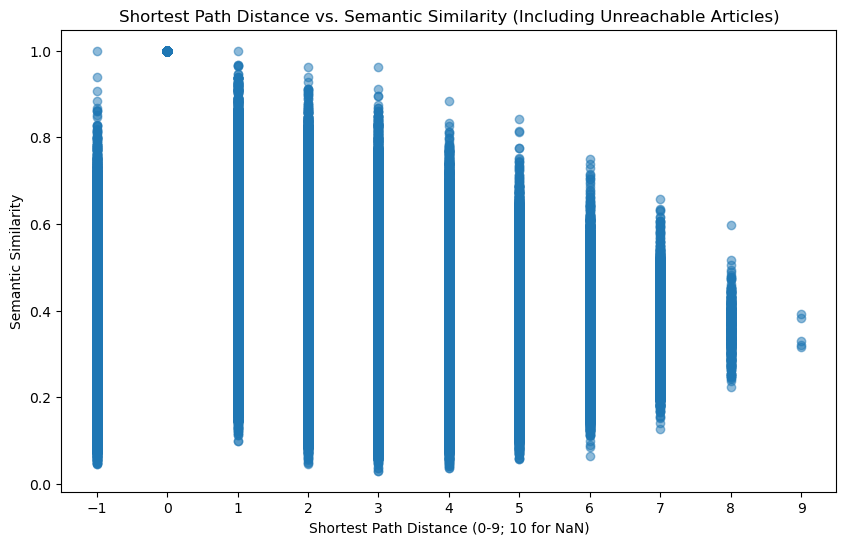

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(shortest_distances, semantic_similarities, alpha=0.5)
plt.xlabel('Shortest Path Distance (0-9; 10 for NaN)')
plt.ylabel('Semantic Similarity')
plt.title('Shortest Path Distance vs. Semantic Similarity (Including Unreachable Articles)')
# show x-thicks
plt.xticks(np.arange(-1, 10, 1))

plt.show()

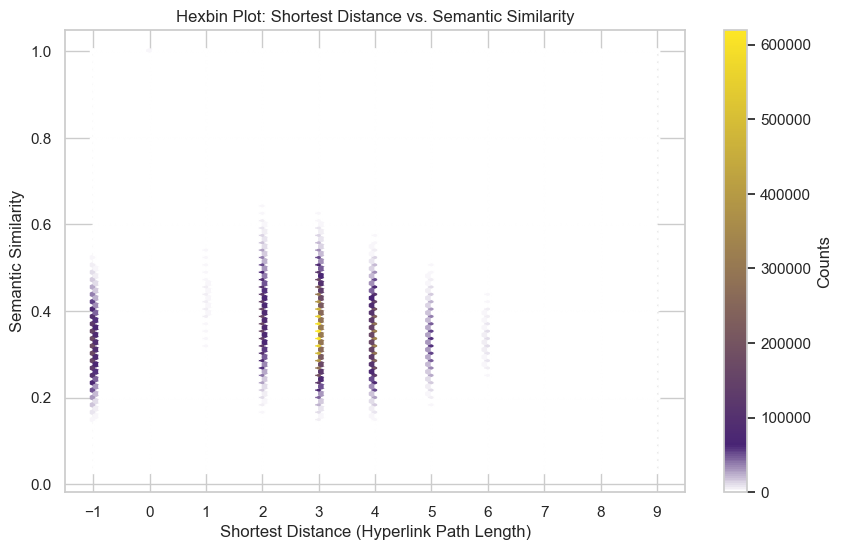

In [9]:
# Define a custom colormap with white for zero values
viridis_with_white = mcolors.LinearSegmentedColormap.from_list(
    "viridis_with_white",
    [
        (0, "white"),          # White for the lowest values
        (0.1, plt.cm.viridis(0.1)),  # Start viridis from a low value
        (1, plt.cm.viridis(1.0)),    # Max viridis value
    ]
)

# Use the custom colormap directly in plotting
plt.figure(figsize=(10, 6))
plt.hexbin(shortest_distances, semantic_similarities, gridsize=100, cmap=viridis_with_white)
plt.colorbar(label='Counts')
plt.xlabel('Shortest Distance (Hyperlink Path Length)')
plt.ylabel('Semantic Similarity')
plt.title('Hexbin Plot: Shortest Distance vs. Semantic Similarity')
plt.xticks(np.arange(-1, 10, 1))
plt.show()


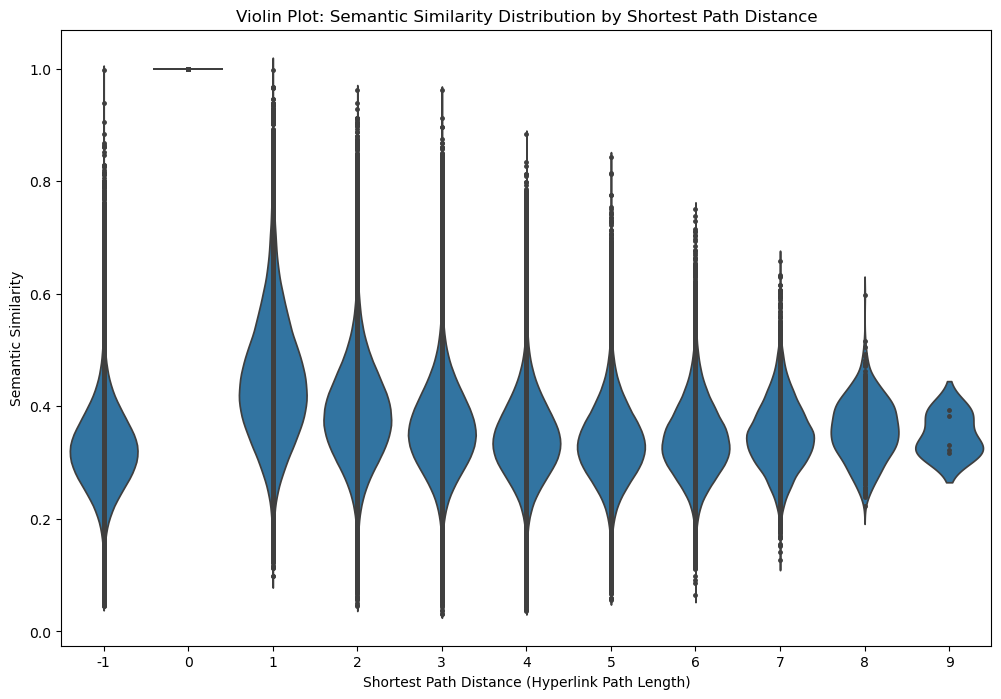

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="Shortest Distance", y="Semantic Similarity", data=df, inner="point", density_norm='width')
plt.xlabel('Shortest Path Distance (Hyperlink Path Length)')
plt.ylabel('Semantic Similarity')
plt.title('Violin Plot: Semantic Similarity Distribution by Shortest Path Distance')
plt.show()

# Correlation

In [30]:
from scipy.stats import pearsonr, spearmanr

# Assuming df is your original DataFrame

# Exclude 'Unreachable' or -1 values and create a copy
df_numeric = df[df['Shortest Distance'] != -1].copy()

# Convert 'Shortest Distance' to numeric using .loc to avoid SettingWithCopyWarning
df_numeric.loc[:, 'Shortest Distance'] = df_numeric['Shortest Distance'].astype(float)

# Pearson correlation
pearson_corr, pearson_p = pearsonr(df_numeric['Shortest Distance'], df_numeric['Semantic Similarity'])
print(f'Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4e}')

# Spearman correlation
spearman_corr, spearman_p = spearmanr(df_numeric['Shortest Distance'], df_numeric['Semantic Similarity'])
print(f'Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4e}')

Pearson correlation: -0.2074, p-value: 0.0000e+00
Spearman correlation: -0.1956, p-value: 0.0000e+00


- Pearson Correlation
Measures the linear relationship between two continuous variables.

- Spearman Correlation
Assesses the monotonic relationship using ranked data, making it less sensitive to outliers and non-linear relationships.

The p-values are effectively zero, which is highly significant statistically. This suggests that the observed correlations are unlikely to be due to random chance.